<a href="https://colab.research.google.com/github/junpito/collections-of-college-task/blob/main/prak3_daming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb 
%matplotlib inline
import sklearn

Kemudian kita akan membuat dataset random dengan sklearn 

In [ ]:
from sklearn.datasets import make_blobs
blobs, classes = make_blobs(500, centers = 3)

Lanjutkan dengan membuat visualisasi nya 

In [ ]:
from sklearn.cluster import KMeans
kmean = KMeans(n_clusters = 3)
kmean.fit(blobs)
KMeans(algorithm = 'auto', copy_x= True,init = 'k-means++', max_iter = 300, n_clusters = 3, n_init = 10,random_state =None, tol = 0.0001, verbose = 0)
kmean.cluster_centers_


array([[ 9.87722468,  3.68310304],
       [ 8.50622487, -0.66466186],
       [ 6.03916847,  8.12156639]])

Text(0.5, 1.0, 'Blobs')

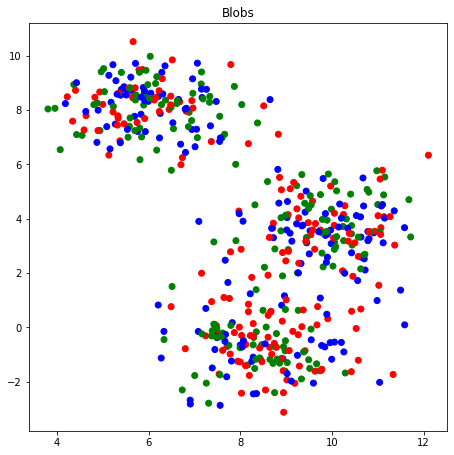

In [ ]:
f ,ax = plt.subplots(figsize = (7.5,7.5))
rgb = np.array (['r', 'g', 'b'])
ax.scatter(blobs[:,0], blobs[:,1], color = rgb[clasess])
ax.set_title('Blobs')



In [ ]:
kmean.labels_[:5]

array([0, 2, 1, 0, 2], dtype=int32)

Periksa kmean label dan class apa kah sama 

In [ ]:
classes[:5]

array([0, 1, 2, 0, 1])

Gunakan transform untuk mengubah ouput menjadi jarak dengan centreoid

In [ ]:
kmean.transform(blobs)[:5]

array([[1.09561778, 3.53910975, 6.74843931],
       [5.53368032, 8.93014352, 0.41825379],
       [5.88509997, 1.43023195, 9.95195604],
       [0.57210225, 4.10752361, 6.39937476],
       [6.30361545, 9.6001819 , 0.47424247]])

Optimisasi dengan mencari angka K atau berapa jumlah kluster yang menghasilkan akurasi yang baik. Pada percobaan kali ini akan digunakan silhoutte dan elbow

In [ ]:
blobs, classes = make_blobs(500, centers=3)
kmean =KMeans(n_clusters=3)
kmean.fit(blobs)
KMeans(algorithm = 'auto', copy_x= True,init = 'k-means++', max_iter = 300, n_clusters = 3, n_init = 10,random_state =None, tol = 0.0001, verbose = 0)

KMeans(n_clusters=3)

Text(0.5, 1.0, 'Blobs')

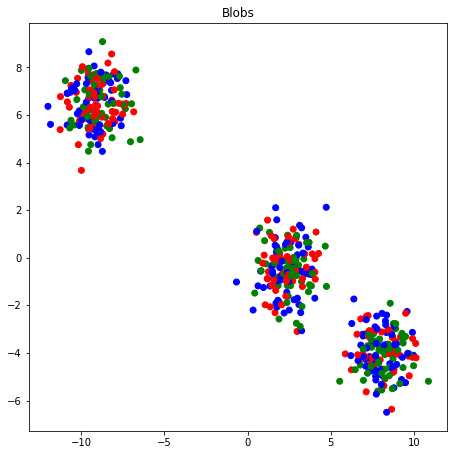

In [ ]:
f ,ax = plt.subplots(figsize = (7.5,7.5))
rgb = np.array (['r', 'g', 'b'])
ax.scatter(blobs[:,0], blobs[:,1], color = rgb[clasess])
ax.set_title('Blobs')

In [ ]:
from sklearn import metrics
silhouette_samples = metrics.silhouette_samples(blobs, kmean.labels_)
np.column_stack((classes[:5], silhouette_samples[:5]))


array([[0.        , 0.8782769 ],
       [1.        , 0.45382291],
       [1.        , 0.75540019],
       [2.        , 0.83038876],
       [2.        , 0.77312489]])

In [ ]:
silhouette_samples.mean()

0.7877279888905664

In [ ]:
metrics.silhouette_samples(blobs, kmean.labels_)

array([0.8782769 , 0.45382291, 0.75540019, 0.83038876, 0.77312489,
       0.56214258, 0.80542378, 0.87841285, 0.81664437, 0.89202528,
       0.77481727, 0.47872017, 0.78129889, 0.66740513, 0.82380319,
       0.74398679, 0.80861363, 0.81940782, 0.88342418, 0.86714298,
       0.79241099, 0.84730924, 0.78616506, 0.89227746, 0.72471615,
       0.83527151, 0.8199399 , 0.76540522, 0.82611142, 0.7924305 ,
       0.69856046, 0.71322059, 0.84798896, 0.80727622, 0.78107557,
       0.77779862, 0.83873954, 0.73010677, 0.75291279, 0.81042877,
       0.82871099, 0.7574197 , 0.80128871, 0.81447183, 0.75600366,
       0.69271247, 0.75450312, 0.78415153, 0.67657358, 0.76452032,
       0.71920204, 0.88434008, 0.76558404, 0.80673182, 0.69808713,
       0.86944378, 0.8057037 , 0.7517504 , 0.79632431, 0.78583134,
       0.81947448, 0.88942747, 0.66768686, 0.88079371, 0.61147348,
       0.78692072, 0.65304162, 0.80210952, 0.78193093, 0.87304789,
       0.62216069, 0.69534357, 0.86694669, 0.75560045, 0.77293

Visualisasikan plot berikut untuk mendapatkan angka terbaik pada klustering 

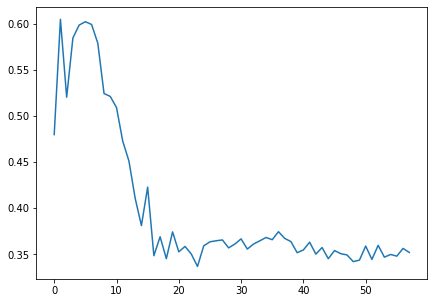

In [ ]:
blobs, classes = make_blobs(500, centers = 10)
silhouette_avgs = []
for k in range (2, 60):
  kmean = KMeans(n_clusters= k ).fit(blobs)
  silhouette_avgs.append(metrics.silhouette_score(blobs, kmean.labels_))


f, ax = plt.subplots(figsize=(7,5))
ax.plot(silhouette_avgs)

Bagaimana menurut anda untuk menentukan angka yang optimum berdasarkan plot di atas? Komfirmasi dengan perhitungan berikut.

In [ ]:
from sklearn.metrics import silhouette_score, silhouette_samples

In [ ]:
for n_clusters in range(2,21):
  km = KMeans (n_clusters = n_clusters)
  preds = km.fit_predict(blobs)
  centers = km.cluster_centers_

score = silhouette_score(blobs, preds, metric= 'euclidean')
print("for n_clusters = {}, silhouette score is {}".format(n_clusters,score))

for n_clusters = 20, silhouette score is 0.3600707411968248


Selanjutnya untuk menentukan angka terbaik pada klastering maka metode elbow ini juga dapat digunakan.

In [ ]:
wcss = []
range_values = range(1,20)
for i in range_values:
  kmeans = KMeans(n_clusters - i)
  kmeans.fit(blobs)
  wcss.append(kmeans.inertia_)

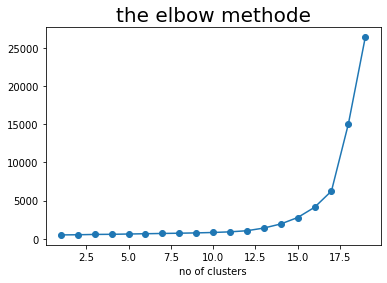

In [ ]:
plt.plot(range(1,20), wcss, marker = 'o')
plt.title('the elbow methode', fontsize = 20)
plt.xlabel('no of clusters')
plt.show()

In [ ]:
Berapa angka optimal yang di dapat dengan menggunakan metode elbow? 

### lat 2



In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/praktikum/credit_card.csv')

In [ ]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb 
%matplotlib inline
import sklearn

Definisikan dataset, lalu tampilkan data dalam 10 baris atas dan 10 baris bawah. Periksa berapa banyak jumlah kolom dan baris. Silahkan jawab pertanyaan berikut dengan membuat skrip pemrograman di notebook Anda. 

a. Berapa dimensi dataset? Dan berapa jumlah instance dan variable (fitur) dalam dataset tersebut?

 b. Tampilkan info dataset. Apa saja tipe data yang terkandung?
 
 
  c. Periksa apakah terdapat data yang null atau data yang kosong. Dan bersihkan variabel yang tidak digunakan 

In [ ]:
#a 
df.shape

(8950, 18)

In [ ]:
#b
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [ ]:
#c
df.isnull

<bound method DataFrame.isnull of      CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     C10001    40.900749           0.818182      95.40              0.00   
1     C10002  3202.467416           0.909091       0.00              0.00   
2     C10003  2495.148862           1.000000     773.17            773.17   
3     C10004  1666.670542           0.636364    1499.00           1499.00   
4     C10005   817.714335           1.000000      16.00             16.00   
...      ...          ...                ...        ...               ...   
8945  C19186    28.493517           1.000000     291.12              0.00   
8946  C19187    19.183215           1.000000     300.00              0.00   
8947  C19188    23.398673           0.833333     144.40              0.00   
8948  C19189    13.457564           0.833333       0.00              0.00   
8949  C19190   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANC

Eksplorasi Data Analisis (Exploratory Data Analysis or EDA), Anda di beri latihan berikut agar mendapatkan informasi penting terkait statistik dalam data lalu memvisualisasikannya agar menjadi sajian data yang mudah dimengerti orang lain.

 a. Deskripsikan statistik dataset.
 
  b. Lakukan proses EDA dengan versi Anda sendiri. 
  
  c. Visualisasikan boxplot dan skewnes dari fitur dengan tipe data numerik, lanjutkan skrip pemrograman berikut

In [ ]:
#a 
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [ ]:
#b
df[['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'PAYMENTS']].describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,PAYMENTS
count,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,1733.143852
std,2081.531879,0.236904,2136.634782,2895.063757
min,0.000000,0.000000,0.000000,0.000000
25%,128.281915,0.888889,39.635000,383.276166
50%,873.385231,1.000000,361.280000,856.901546
75%,2054.140036,1.000000,1110.130000,1901.134317
max,19043.138560,1.000000,49039.570000,50721.483360


In [ ]:
#fungsi value_counts() pada fitur CUST_ID dan PAYMENTS
df.value_counts('CUST_ID')

CUST_ID
C10001    1
C16135    1
C16129    1
C16130    1
C16131    1
         ..
C13065    1
C13064    1
C13063    1
C13062    1
C19190    1
Length: 8950, dtype: int64

In [ ]:
df.value_counts('PAYMENTS')

PAYMENTS
0.000000        240
1479.003541       1
1476.991573       1
1477.151065       1
1477.267198       1
               ... 
543.788113        1
543.321868        1
542.919146        1
542.836917        1
50721.483360      1
Length: 8711, dtype: int64

In [ ]:
#persentase distribusi dari jumlah data pada fitur BALANCE dan PURCHASES
df["BALANCE"].value_counts()/df["BALANCE"].count()*100

0.000000       0.893855
40.900749      0.011173
1213.551338    0.011173
1253.188317    0.011173
5058.299635    0.011173
                 ...   
8791.161142    0.011173
2320.402196    0.011173
7215.745096    0.011173
1013.233120    0.011173
372.708075     0.011173
Name: BALANCE, Length: 8871, dtype: float64

In [ ]:
df["PURCHASES"].value_counts()/df["PURCHASES"].count()*100

0.00       22.837989
45.65       0.301676
60.00       0.178771
150.00      0.178771
300.00      0.145251
             ...    
222.70      0.011173
433.20      0.011173
509.88      0.011173
65.50       0.011173
1093.25     0.011173
Name: PURCHASES, Length: 6203, dtype: float64

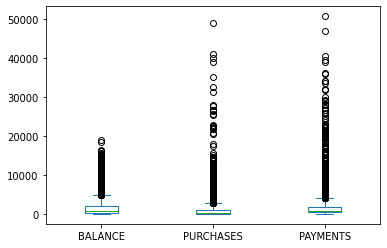

In [ ]:
#Boxplot
df[['BALANCE', 'PURCHASES', 'PAYMENTS']].plot.box()

In [ ]:
#Matriks Korelasi
corr = df[['BALANCE', 'PURCHASES', 'PAYMENTS']].corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  This is separate from the ipykernel package so we can avoid doing imports until


,BALANCE,PURCHASES,PAYMENTS
BALANCE,1.00,0.18,0.32
PURCHASES,0.18,1.00,0.60
PAYMENTS,0.32,0.60,1.00


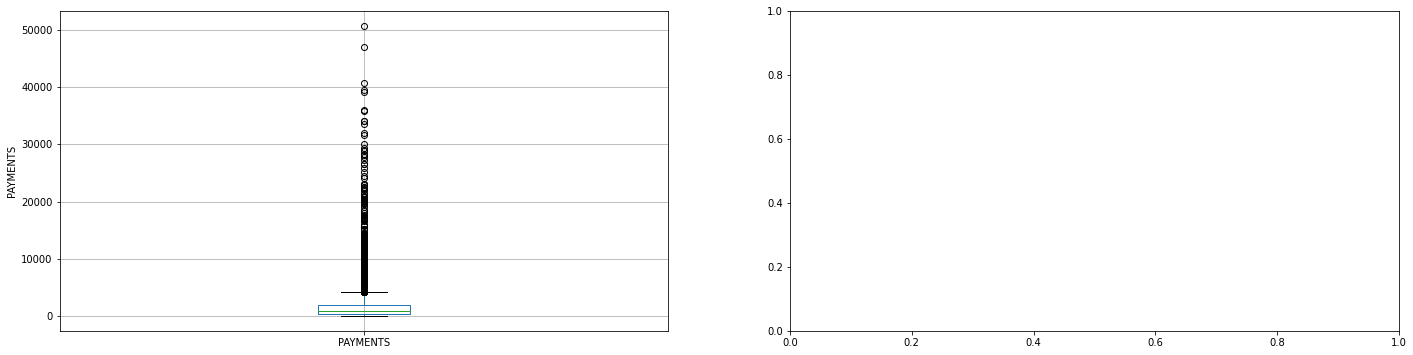

In [ ]:
# C. 
plt.figure(figsize=(24,20))

plt.subplot(3, 2, 1)
fig = df.boxplot(column="PAYMENTS")
fig.set_title('')
fig.set_ylabel('PAYMENTS')

plt.subplot(3, 2, 2) 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness:  2.393386042571806
Kurtosis:  7.6747512999062515


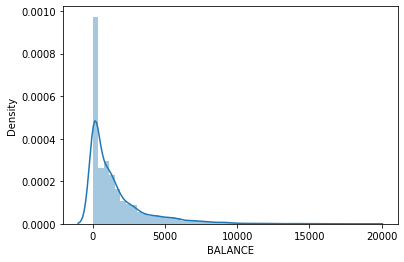

In [ ]:
sb.distplot(df['BALANCE'])
print("Skewness: ", df['BALANCE'].skew())
print("Kurtosis: ", df['BALANCE'].kurt())

3. . Mencari angka optimum clustering. Gunakan dua metode elbow dan silhoutte. Output berupa grafik dan jumlah kemungkinan n clustering pada silhoutte.

 Silhoutte

In [ ]:
import sklearn.metrics as metrics
import sklearn.cluster as cluster

In [ ]:
SK = range(3,13)
sil_score = []
for i in SK:
    labels=cluster.KMeans(n_clusters=i,init="k-means++",random_state=200).fit(df).labels_
    score = metrics.silhouette_score(df,labels,metric="euclidean",sample_size=1000,random_state=200)
    sil_score.append(score)
    print ("Silhouette score for k(clusters) = "+str(i)+" is "
           +str(metrics.silhouette_score(df,labels,metric="euclidean",sample_size=1000,random_state=200)))

Silhouette score for k(clusters) = 3 is 0.45913031286895445
Silhouette score for k(clusters) = 4 is 0.38102444549500764
Silhouette score for k(clusters) = 5 is 0.37666249218430387
Silhouette score for k(clusters) = 6 is 0.37800822183700056
Silhouette score for k(clusters) = 7 is 0.35314022411001167
Silhouette score for k(clusters) = 8 is 0.35959487533502044
Silhouette score for k(clusters) = 9 is 0.3405452070757968
Silhouette score for k(clusters) = 10 is 0.3509244508886415
Silhouette score for k(clusters) = 11 is 0.35261193014004893
Silhouette score for k(clusters) = 12 is 0.36101189968816144


In [ ]:
sil_centers = pd.DataFrame({'Clusters' : SK, 'Sil Score' : sil_score})
sil_centers

,Clusters,Sil Score
0,3,0.459130
1,4,0.381024
2,5,0.376662
3,6,0.378008
4,7,0.353140
5,8,0.359595
6,9,0.340545
7,10,0.350924
8,11,0.352612
9,12,0.361012


<AxesSubplot:xlabel='Clusters', ylabel='Sil Score'>

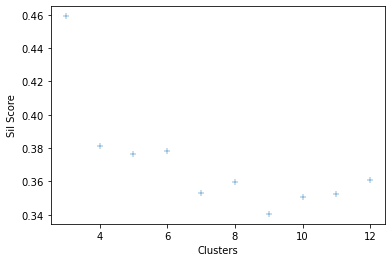

In [ ]:
sb.scatterplot(x = 'Clusters', y = 'Sil Score', data = sil_centers, marker="+")

Elbow

In [ ]:
import sklearn.cluster as cluster

In [ ]:
K = range(1,12)
wss = []
for k in K:
    kmeans=cluster.KMeans(n_clusters=k,init="k-means++")
    kmeans=kmeans.fit(df)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)

In [ ]:
mycenters = pd.DataFrame({'Clusters' : K, 'WSS' : wss})
mycenters

,Clusters,WSS
0,1,3.930610e+11
1,2,2.792966e+11
2,3,2.328064e+11
3,4,2.067324e+11
4,5,1.817582e+11
5,6,1.624019e+11
6,7,1.452836e+11
7,8,1.328727e+11
8,9,1.241865e+11
9,10,1.171223e+11


<AxesSubplot:xlabel='Clusters', ylabel='WSS'>

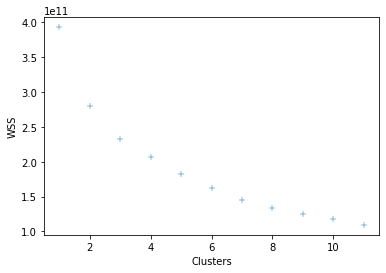

In [ ]:
sb.scatterplot(x = 'Clusters', y = 'WSS', data = mycenters, marker="+")

4. Lakukan normalisasi data, lalu cek distribusi data pada Balance dan apakah sama sebelum dilakukan normalisasi?

In [ ]:
# get balanced data
df['BALANCE']

0         40.900749
1       3202.467416
2       2495.148862
3       1666.670542
4        817.714335
           ...     
8945      28.493517
8946      19.183215
8947      23.398673
8948      13.457564
8949     372.708075
Name: BALANCE, Length: 8950, dtype: float64

<AxesSubplot:xlabel='BALANCE', ylabel='Density'>

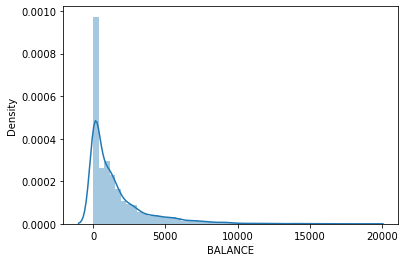

In [ ]:
# check distribution of BALANCE
sb.distplot(df['BALANCE'])

In [ ]:
# create new dataframe with BALANCE
df_balance = pd.DataFrame(df['BALANCE'])

# do transformation 
df_balance['BALANCE'] = np.log(df['BALANCE'])

# replace if value is -inf with 0
df_balance['BALANCE'] = df_balance['BALANCE'].replace(-np.inf, 0)

/Users/dimas/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
df_balance['BALANCE']

0       3.711148
1       8.071677
2       7.822104
3       7.418583
4       6.706513
          ...   
8945    3.349677
8946    2.954036
8947    3.152679
8948    2.599541
8949    5.920795
Name: BALANCE, Length: 8950, dtype: float64

<AxesSubplot:xlabel='BALANCE', ylabel='Density'>

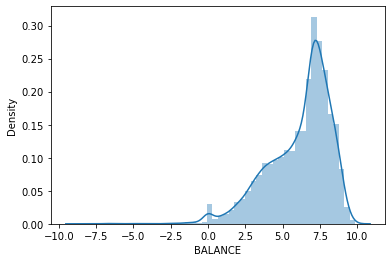

In [ ]:
# check distribution of BALANCE
sb.distplot(df_balance['BALANCE'])

5. Lakukan proses clustering dengan, memanggil kmeans dari scikitlearn library, lalu definisikan n_cluster yang sudah di dapat dari angka optimum. Tambahkan kolom baru dengan df['Kmeans_label'] yang memuat dari kmeans.labels_

In [ ]:
df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

Antara CREDIT_LIMIT-BALANCE

In [ ]:
X = df.iloc[:,[12,0]]
X.head()

,CREDIT_LIMIT,BALANCE
0,1000.0,40.900749
1,7000.0,3202.467416
2,7500.0,2495.148862
3,7500.0,1666.670542
4,1200.0,817.714335


In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
X = X.values

In [ ]:
df['Kmeans_label'] = pd.DataFrame(y_kmeans)

In [ ]:
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Kmeans_label
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,2
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,1
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6,1
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,1
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,1


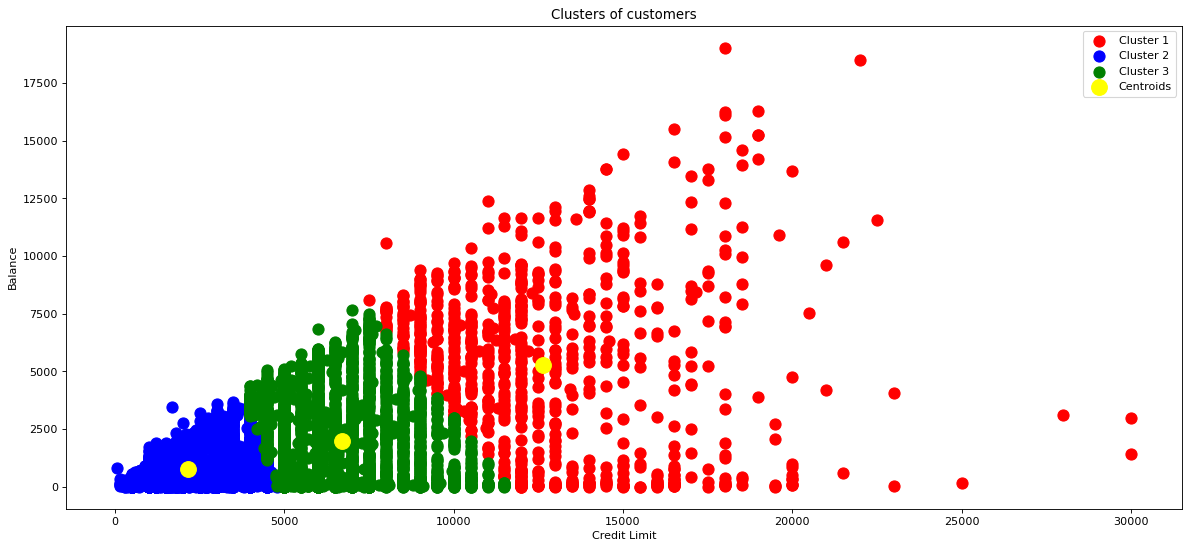

In [ ]:
plt.figure(figsize=(18, 8), dpi=80)
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Credit Limit')
plt.ylabel('Balance')
plt.legend()
plt.show()

6. Visualisasikan setiap kolom atau fitur di dataset terhadap fitur balance (sebagai variabel x) dengan scatter plot dan tampilkan legend dari grafiknya. Analisis hasil dari grafik di atas! Bagaimana kesimpulan Anda?

In [ ]:
df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'Kmeans_label'],
      dtype='object')

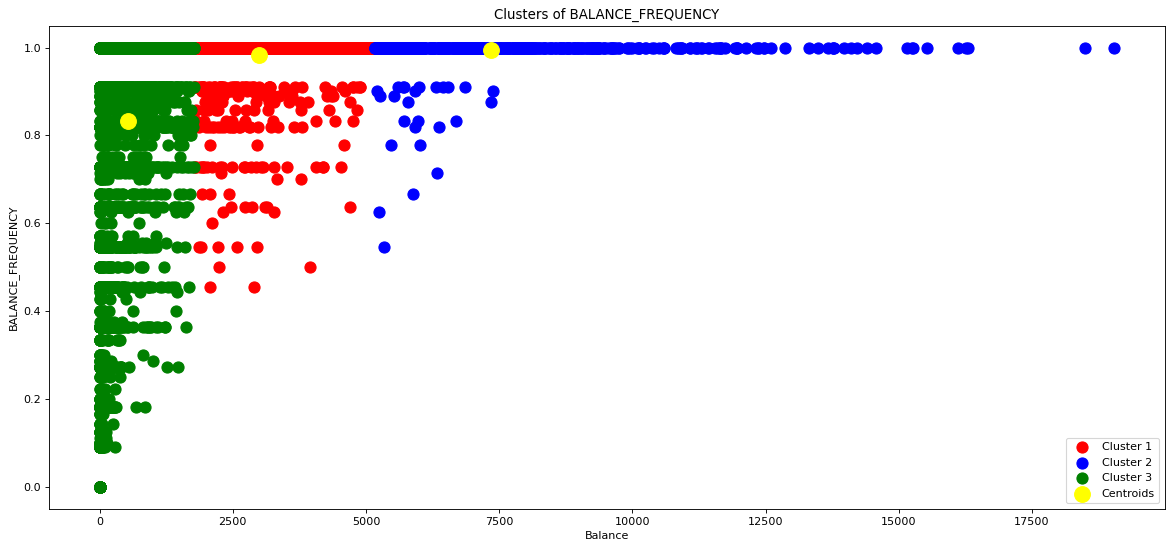

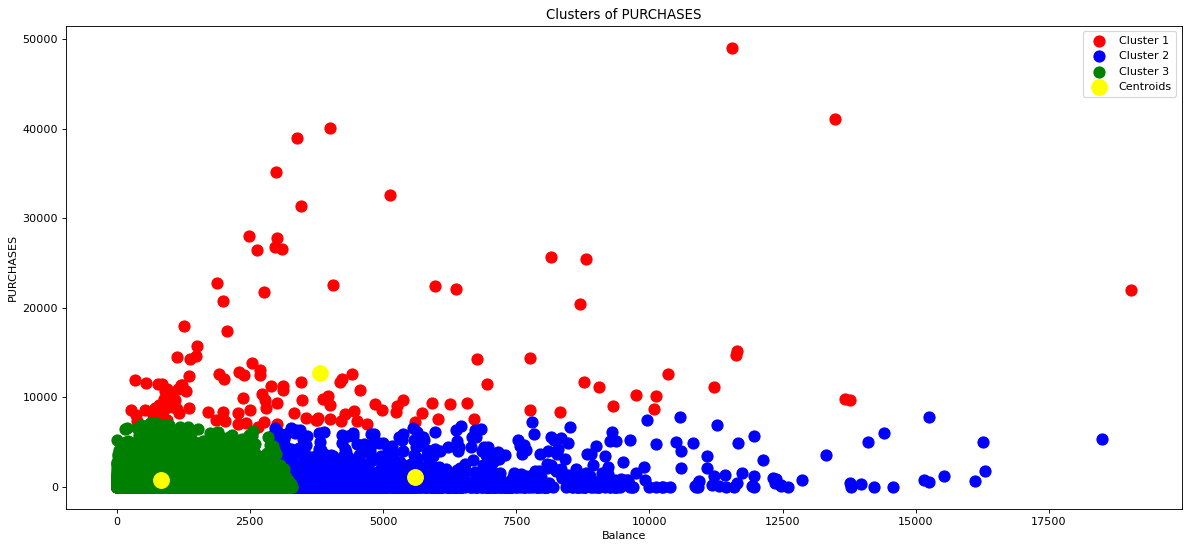

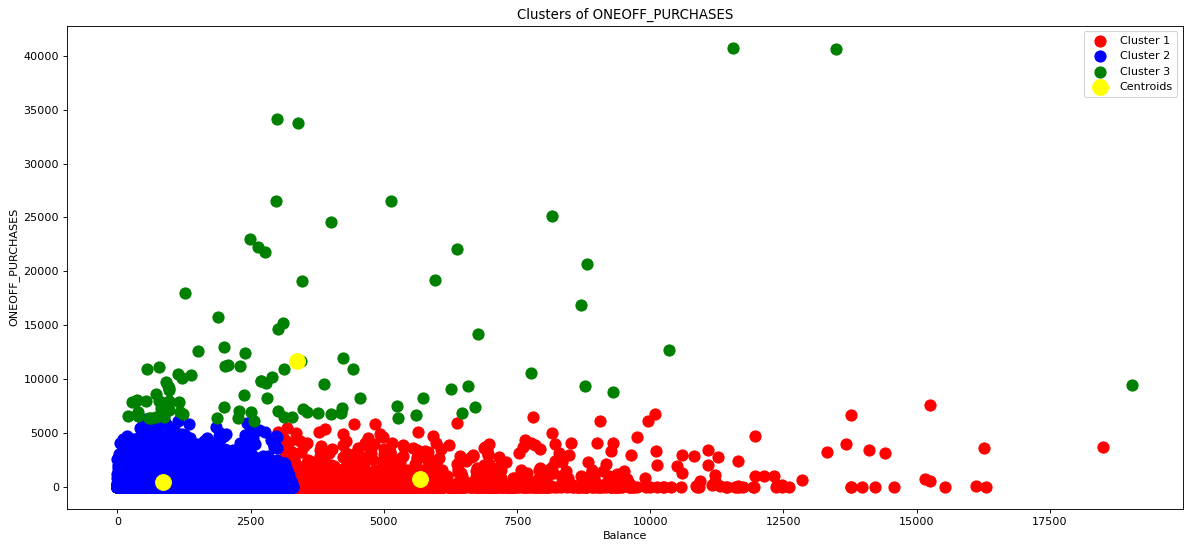

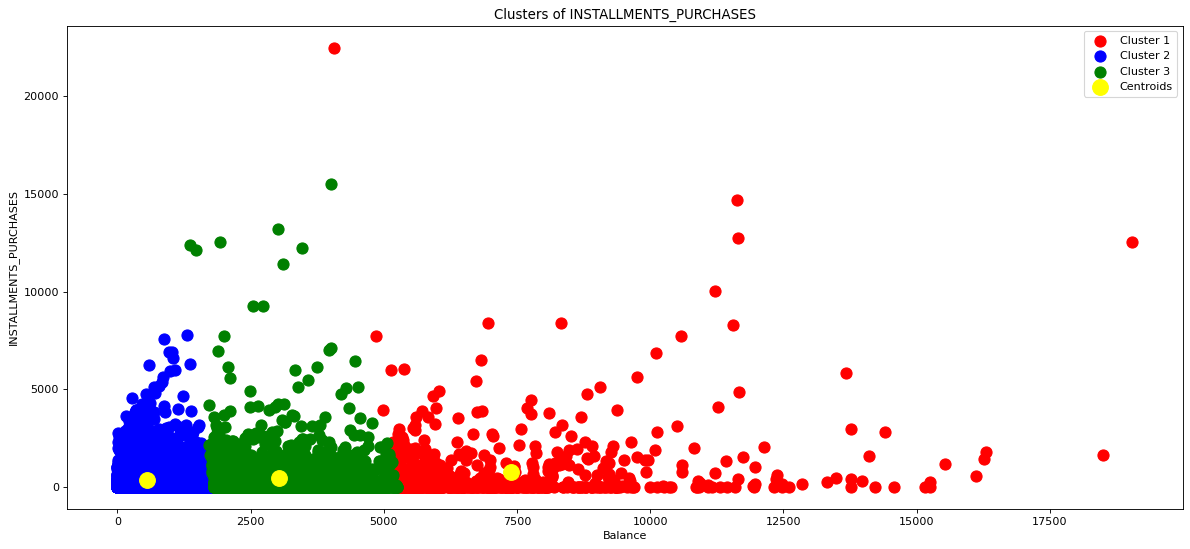

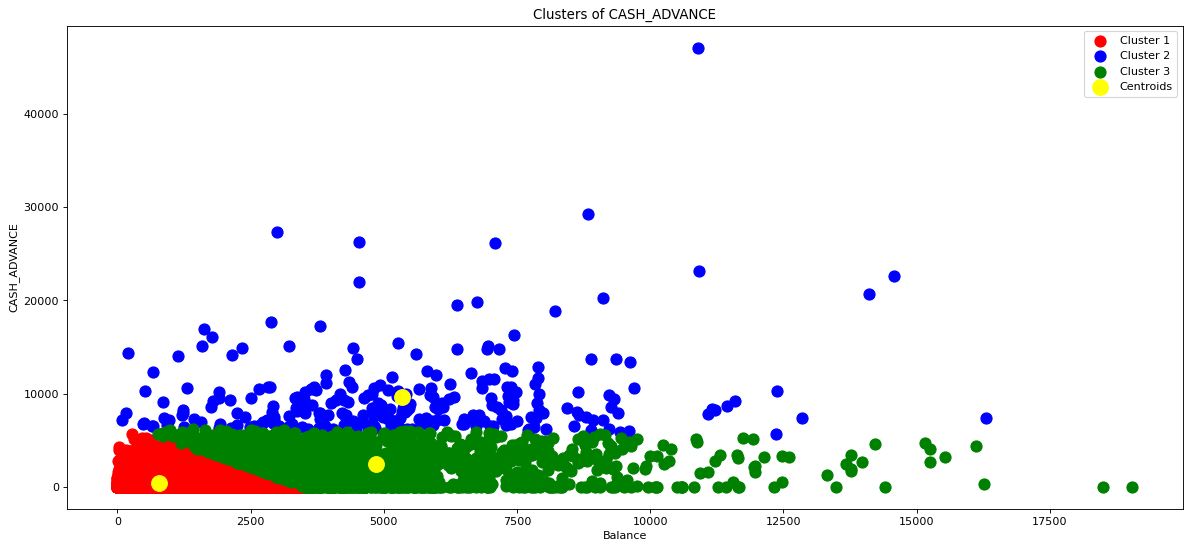

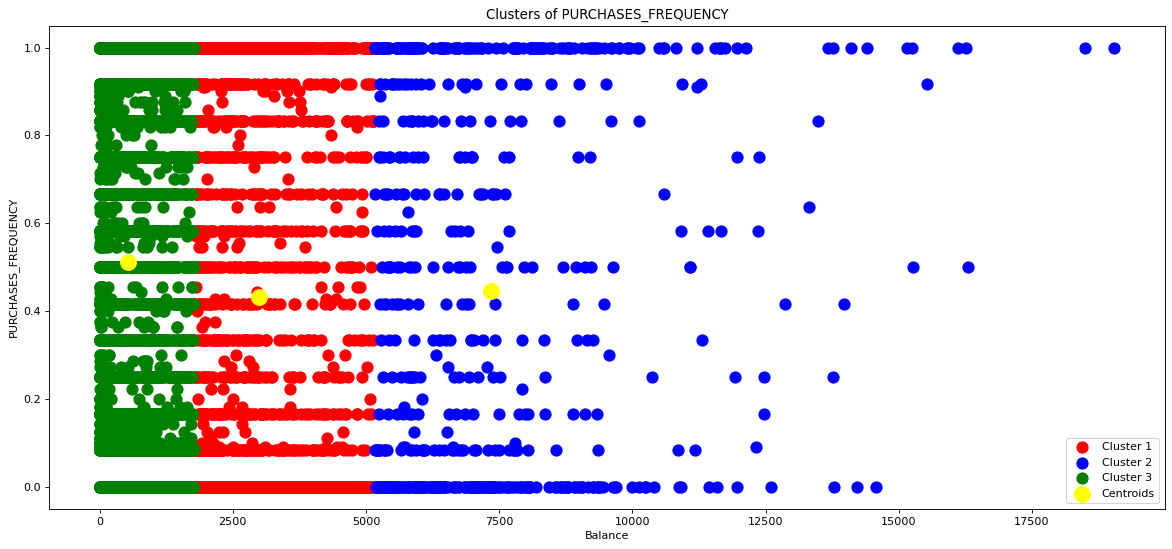

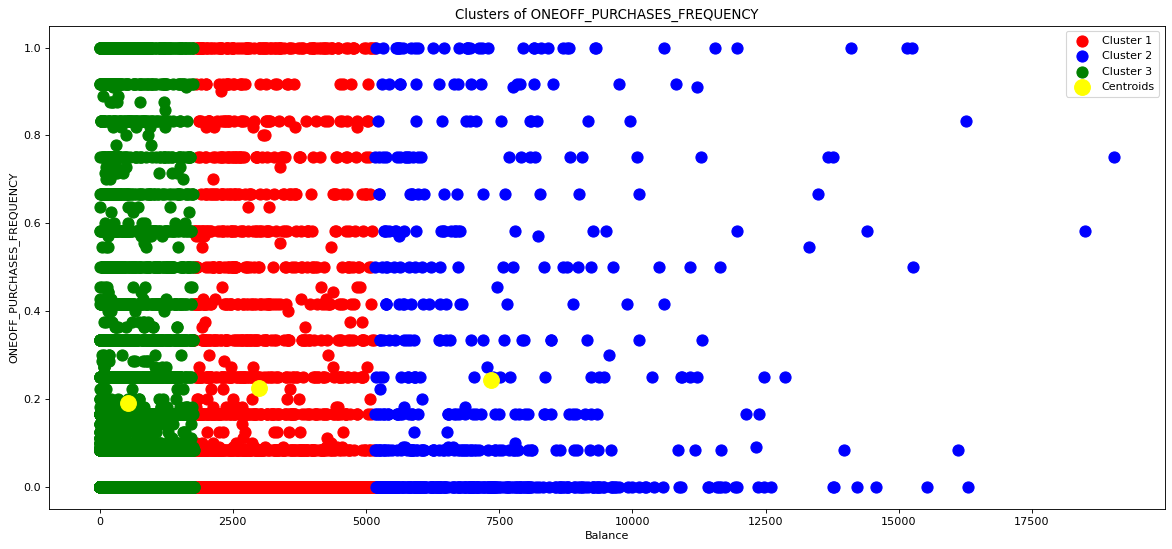

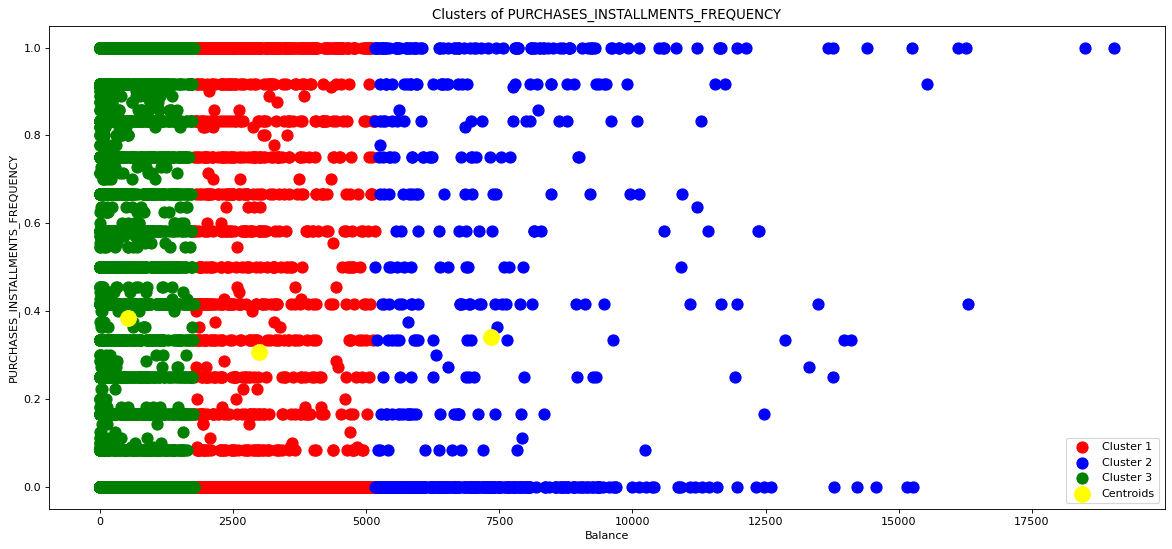

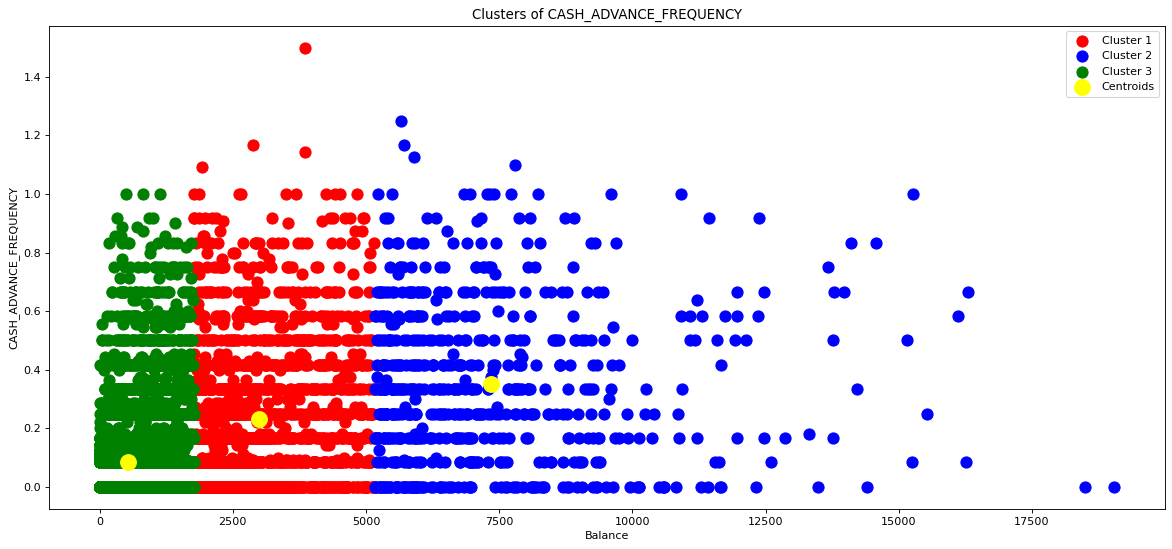

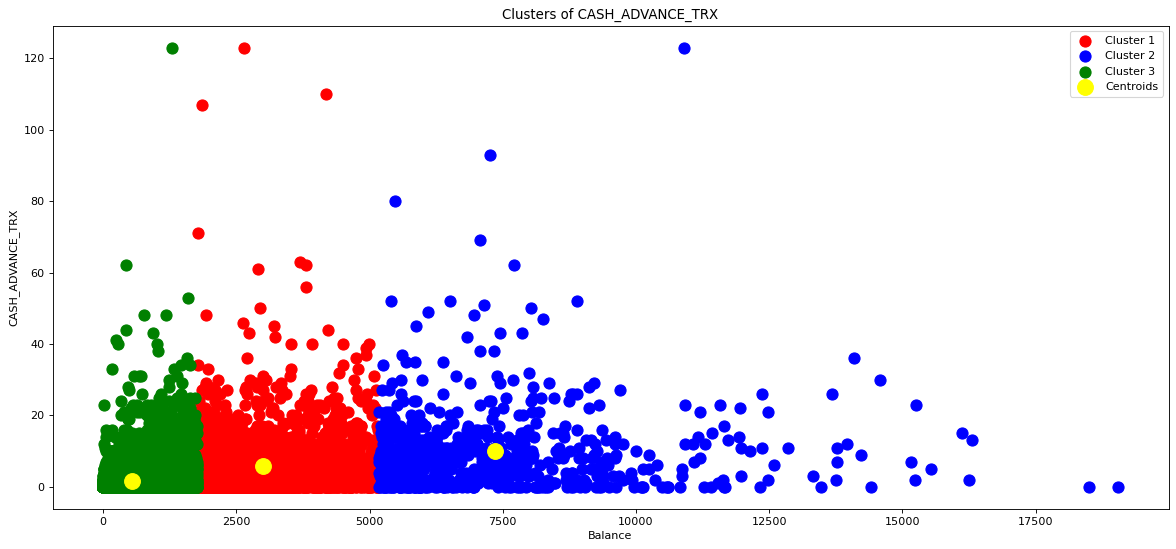

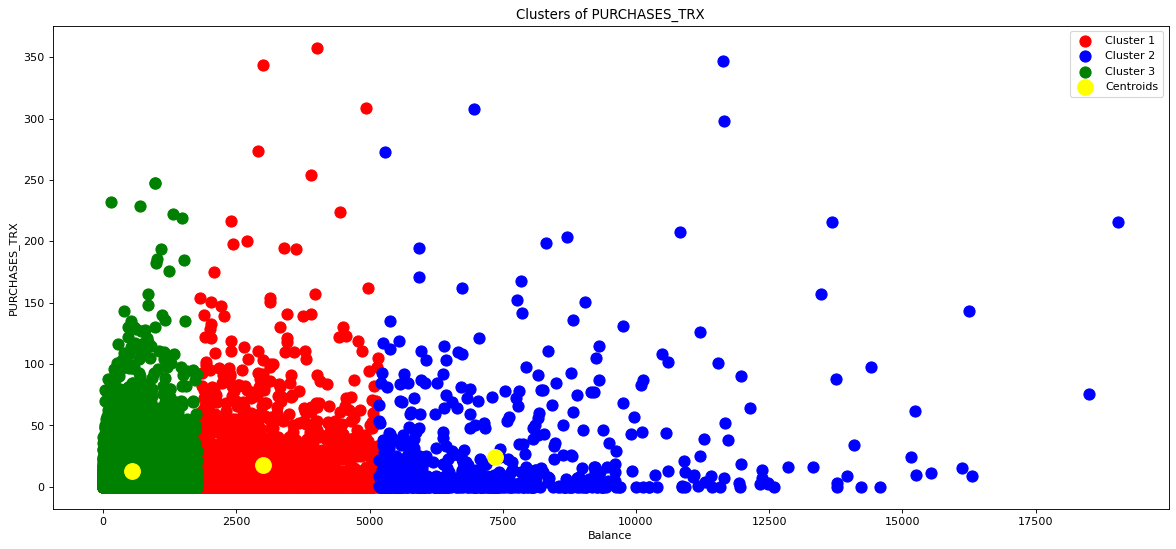

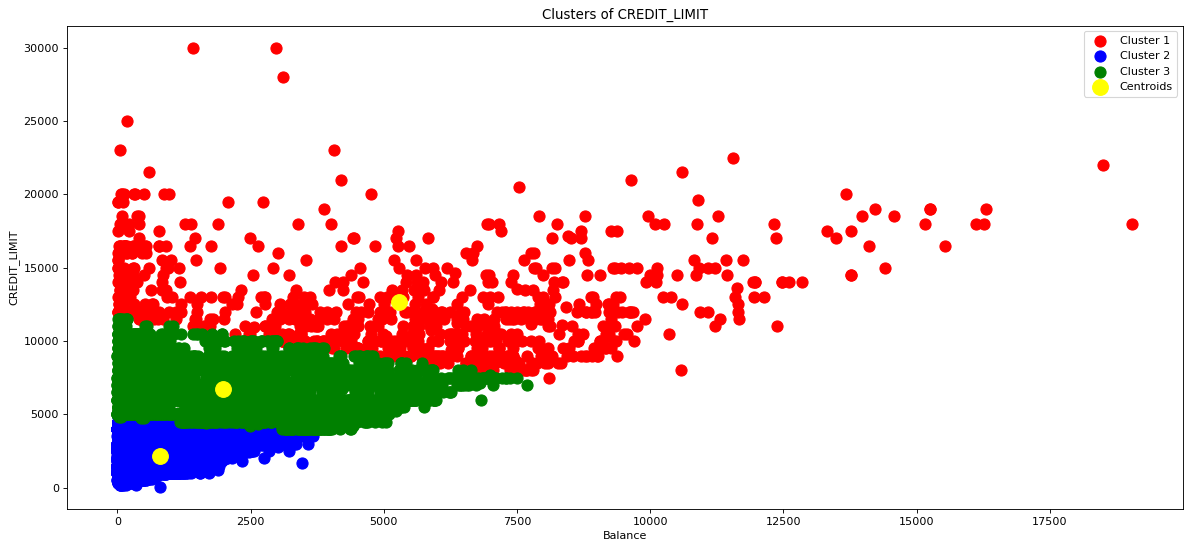

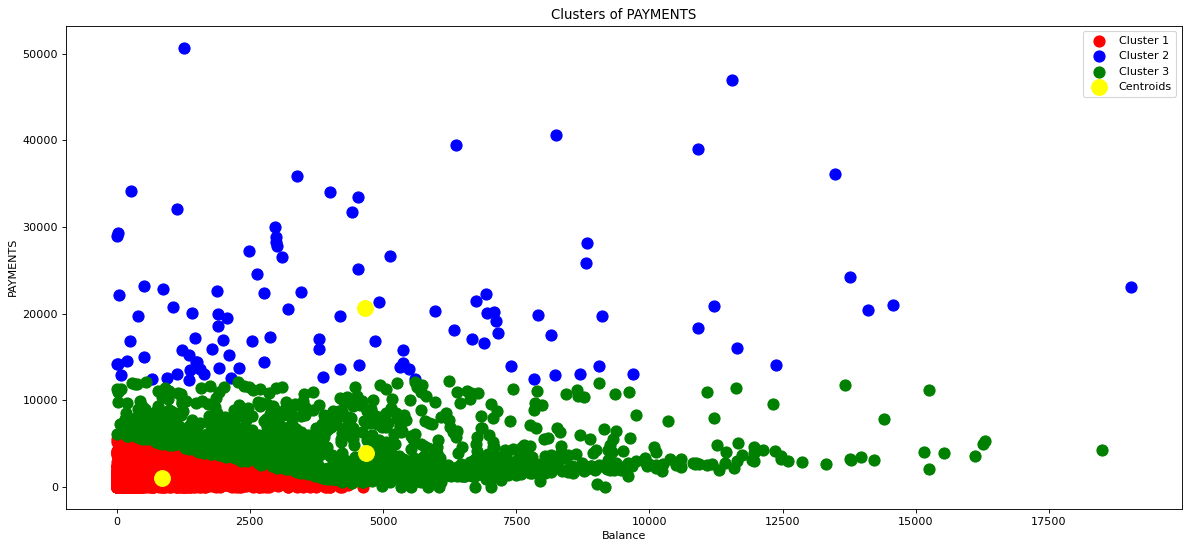

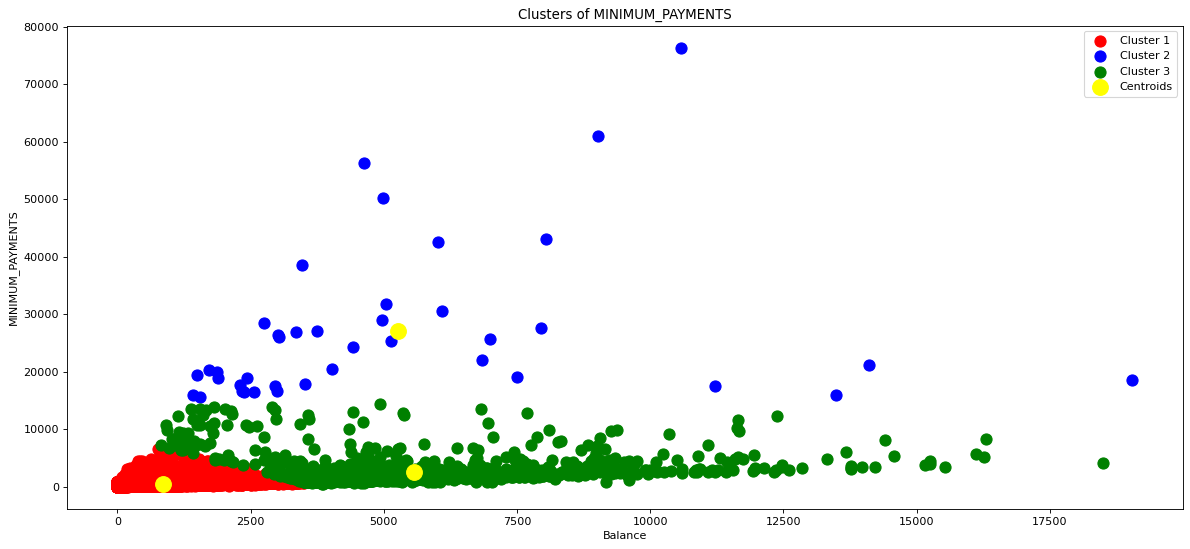

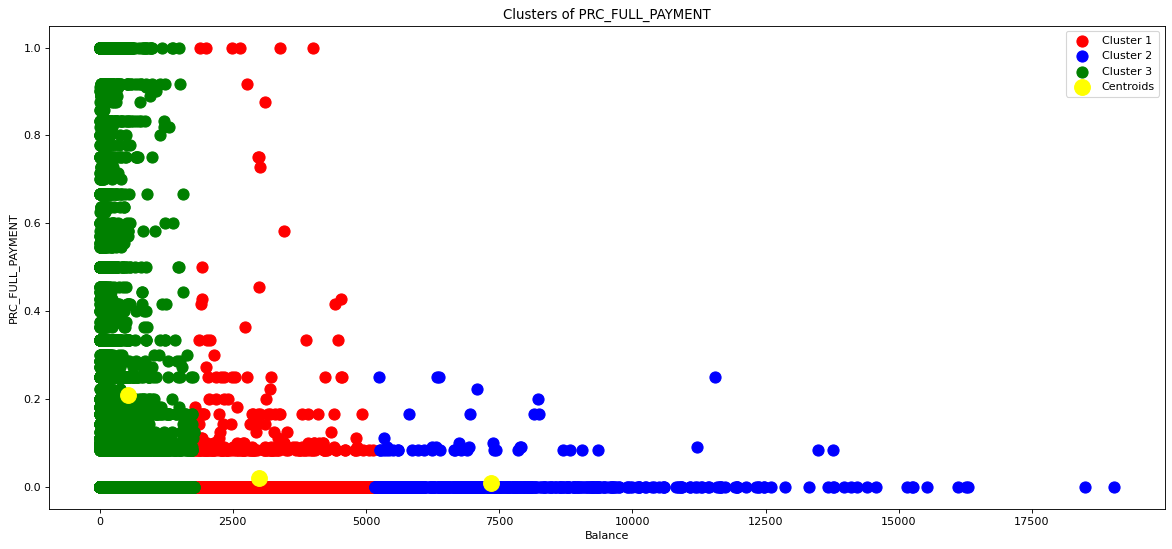

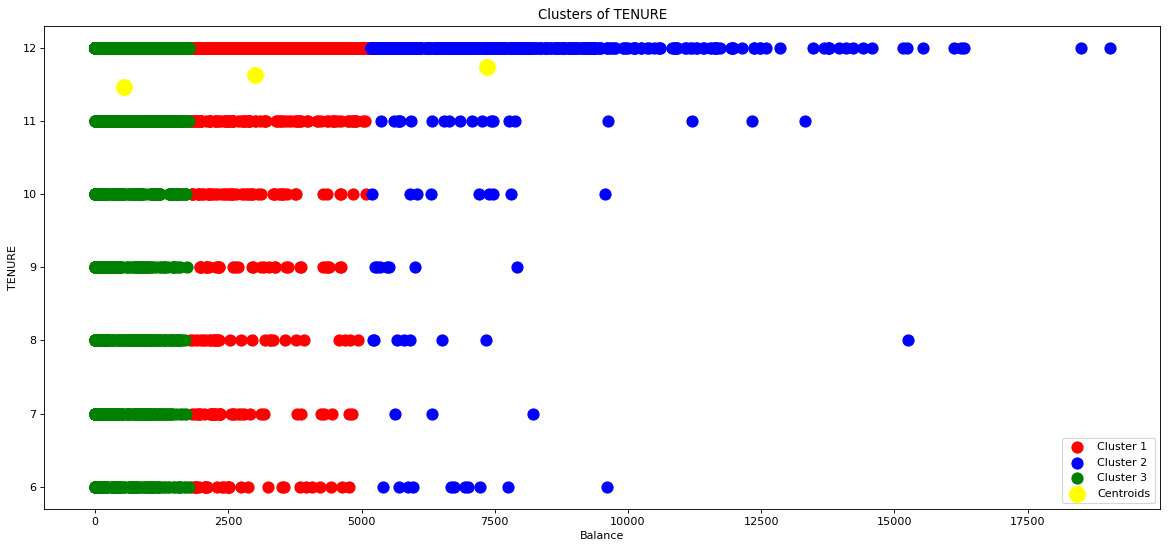

In [ ]:
for column in range(1, 17):
    X = df.iloc[:,[0, column]]

    kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
    y_kmeans = kmeans.fit_predict(X)
    X = X.values

    plt.figure(figsize=(18, 8), dpi=80)
    plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
    plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
    plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
    # plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'yellow', label = 'Centroids')
    plt.title(f'Clusters of {df.columns[column]}')
    plt.xlabel('Balance')
    plt.ylabel(df.columns[column])
    plt.legend()
    plt.show()